<a href="https://colab.research.google.com/github/KOISSYK/AI_class_machine-learning/blob/main/3_1_K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접 이웃회귀 

>데이터 준비

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

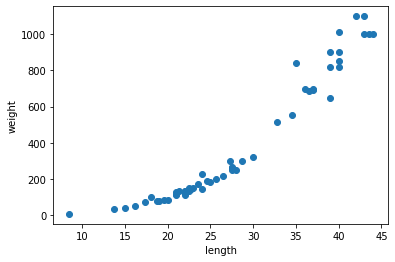

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
#훈련세트와 테스트세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    perch_length,perch_weight,random_state=42)

In [ ]:
#훈련세트와 테스트세트를 2차원 배열로 만들기
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


>k-최근접 이웃 회귀 모델을 훈련 // 결정 계수 (R^2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)  #모델 훈련 
knr.score(test_input,test_target)

0.992809406101064

In [ ]:
from sklearn.metrics import mean_absolute_error
#테스트 세트에 대한 예측을 만들어 줍니다.
test_prediction = knr.predict(test_input)
#테스트 세트에 대한 평균 절댓값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


>과대적합 vs 과소적합



*   과대적합 : 훈련모델을 지나지게 최적합하여 발생하는 문제 
즉 모델을 지나치게 복잡하게 학습하여 학습 데이터셋에서는 모델 성능이 높게 나타나지만 정작 새로운 데이터가 주어졌을 때 정확한 예측/분류를 수행하지 못합니다.
*   과소적합 : 머신러닝에서 통계모형의 능력부족으로 학습데이터를 충분히 설명하지 못해 발생하는 문제



In [ ]:
print(knr.score(train_input,train_target))

0.8612516394391274


In [ ]:
knr.n_neighbors=3
knr.fit(train_input,train_target)
print(knr.score(test_input,test_target))

0.9746459963987609


In [ ]:
knr.n_neighbors=4
knr.fit(train_input,train_target)
print(knr.score(test_input,test_target))

0.9840231023848637


In [ ]:
knr.n_neighbors=5
knr.fit(train_input,train_target)
print(knr.score(test_input,test_target))

0.992809406101064


>확인문제

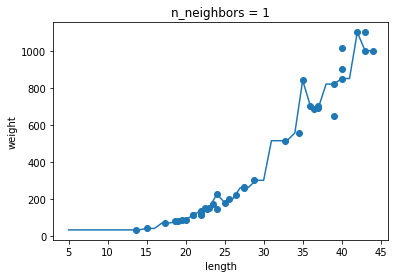

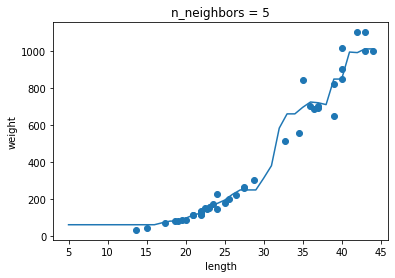

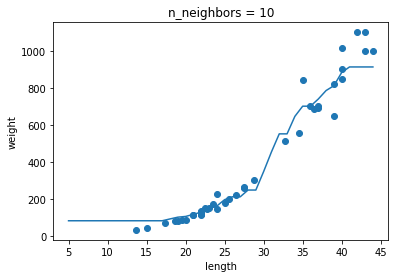

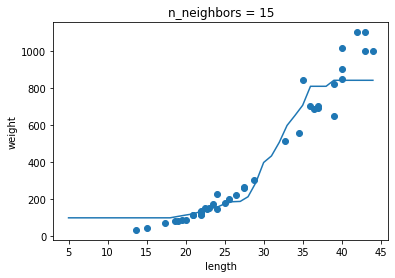

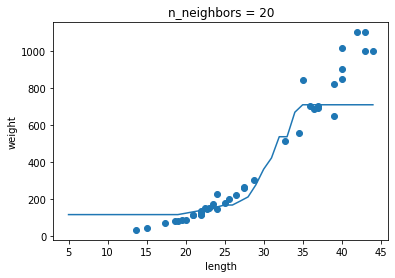

In [ ]:
#k-최근접 이웃 회귀 객체를 생성합니다.
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x= np.arange(5,45).reshape(-1,1)

# n = 1, 5, 10,15,20 일 때 예측 결과를 그래프로 그립니다.
for n in [1,5,10,15,20]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)  #모델훈련

  prediction = knr.predict(x)  ## 지정한 범위 x에 대한 예측
# 훈련 세트와 예측 결과 그래프 그리기
  plt.scatter(train_input,train_target)
  plt.plot(x,prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()